## 3.5 Damped Oscillations

Thus, if a particle of mass $m$ moves under the combined influence of a linear restoring force $-kx$ and a resusting force $-b\dot{x}$, the differential equation describing the motion is

$$
    m\ddot{x} + b\dot{x} + kx = 0 \tag{3.34}
$$

which we can write as

$$
    \require{enclose}
    \enclose{box}{
        \ddot{x} + 2\beta\dot{x} + \omega^2_0 x = 0 
    } \tag{3.35}
$$

Here $\beta = b/2m$ is the **damping parameter** and $\omega_0 = \sqrt{k/m}$ is the characteristic angular frequency in the absence of damping. The roots of the auxiliary equation are

$$
    \begin{array}{c} 
        r_1 = -\beta + \sqrt{\beta^2 - \omega^2_0} \\
        r_2 = -\beta - \sqrt{\beta^2 - \omega^2_0} \\
    \end{array} \tag{3.36}
$$

The general solution of Equation 3.35 is therefore

$$
    \require{enclose}
    \enclose{box}{
        x(t) = e^{-\beta t}[A_1 \exp(\sqrt{\beta^2 - \omega^2_0} t) + A_2 \exp(-\sqrt{\beta^2 - \omega^2_0}t)]
    } \tag{3.37}
$$

There are three general cases of interest:

* Underdamping:      $\omega^2_0 > \beta^2$
* Critical damping:  $\omega^2_0 = \beta^2$
* Overdamping:       $\omega^2_0 < \beta^2$

The motion of the three cases is shown schematically in Figure 3-6 for specific initial conditions. We shall see that only the case of underdamping results in oscillatory motion. These three cases are discussed separately.

(-0.75, 1.25)

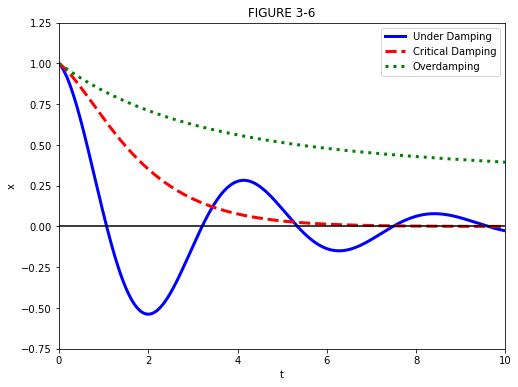

In [7]:
import numpy as np
import matplotlib.pyplot as plt

betaU = 0.3
betaC = 1
betaO = 0.2
omega0U = 1.5
omega1U = np.sqrt(omega0U**2-betaU**2)
omega0O = 0.1
omega2O = np.sqrt(betaO**2-omega0O**2)

A1 = 0.5
A2 = 0.5
A = 1
B = 0.8

t = np.linspace(0, 10, 1000)
xU = np.exp(-betaU*t)*(A1*np.exp(1j*omega1U*t)+A2*np.exp(-1j*omega1U*t))
xC = (A+B*t)*np.exp(-betaC*t)
xO = np.exp(-betaO*t)*(A1*np.exp(omega2O*t)+A2*np.exp(-omega2O*t))
x0 = t*0

fig, p = plt.subplots(figsize=(8,6))

p.plot(t, np.real(xU),'-b', label='Under Damping', lw=3)
p.plot(t, np.real(xC),'--r', label='Critical Damping', lw=3)
p.plot(t, np.real(xO),':g', label='Overdamping', lw=3)
p.plot(t, x0,'-k')
plt.title('FIGURE 3-6')

p.set_xlabel('t')
p.set_ylabel('x')
p.legend()
p.set_xlim([0, 10])
p.set_ylim([-0.75, 1.25])

### Underdamped Motion

For the case of underdamped motion, it is convenient to define

$$
    \omega^2_1 \equiv \omega^2_0 - \beta^2
$$

where $\omega^2_1 > 0$; then the exponents in the brackets of Equation 3.37 are imaginary, and the solution becomes

$$
    x(t) = e^{-\beta t}[A_1 e^{i \omega_1 t} + A_2 e^{-i \omega_1 t}]
$$

Equation 3.39 can be written as

$$
    x(t) = A e^{-\beta t} \cos(\omega_1 t - \delta)
$$

we call (p.110)

[]

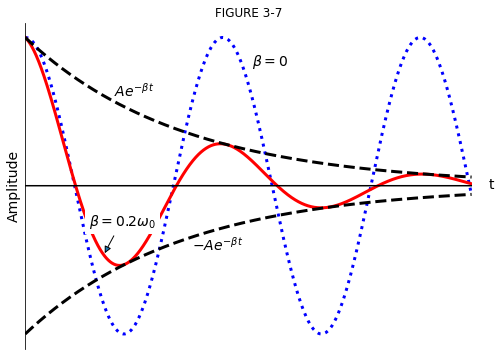

In [69]:
import numpy as np
import matplotlib.pyplot as plt

beta0 = 0
beta1 = 0.2
omega0 = 1
omega10 = np.sqrt(omega0**2-beta0**2)
omega11 = np.sqrt(omega0**2-beta1**2)
delta = 0

A = 1

t = np.linspace(0, 14.2, 1420)
xU0 = A*np.exp(-beta0*t)*np.cos(omega10*t-delta)
xU1 = A*np.exp(-beta1*t)*np.cos(omega11*t-delta)
xenP = A*np.exp(-beta1*t)
xenN = -A*np.exp(-beta1*t)
x0 = t*0

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t, np.real(xU0),':b', label='β = 0', lw=3)
ax.plot(t, np.real(xU1),'-r', label=r'$β = 0.2 ω_0$', lw=3)
ax.plot(t, np.real(xenP),'--k', label= r'$+A e^{-βt}$', lw=3)
ax.plot(t, np.real(xenN),'--k', label= r'$-A e^{-βt}$', lw=3)
ax.plot(t, x0,'-k')
plt.title('FIGURE 3-7')

ta = ax.annotate(r'$\beta = 0.2 \omega_0$', xy=(t[250], xU1[250]), xycoords='data',
             xytext=(-15, +30), textcoords='offset points', fontsize=14,
             arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=.02"))
ta.set_bbox(dict(facecolor='white', alpha=1, edgecolor='none'))

tb = ax.annotate(r'$\beta = 0$', xy = (t[690], xU0[690]), xycoords='data',
             xytext=(+10, +0), textcoords='offset points', fontsize=14)

tc = ax.annotate(r'$ A e^{-βt}$', xy = (t[250], xenP[250]), xycoords='data',
             xytext=(+10, +0), textcoords='offset points', fontsize=14)
td = ax.annotate(r'$-A e^{-βt}$', xy = (t[500], xenN[500]), xycoords='data',
             xytext=(+10, -10), textcoords='offset points', fontsize=14)


ax.set_xlabel('t', loc='right', fontsize=14)
ax.xaxis.set_label_coords(1.05, 0.525)
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlim([0, 14.2])

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])

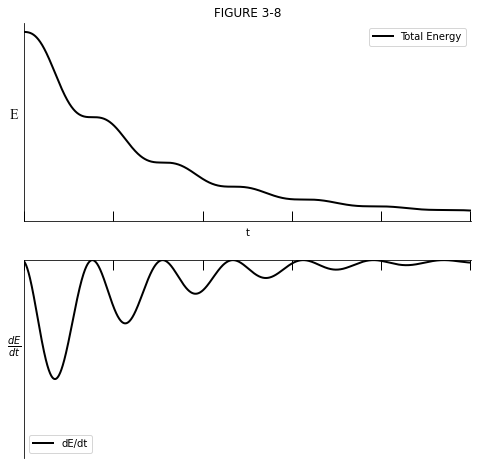

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
count = 0

k = 1
m = 1

beta = 0.1
omega0 = np.sqrt(k/m)
omega1 = np.sqrt(omega0**2-beta**2)
delta = 0

A = 1

start = 0
end = 21
resolution = (end-start)*100

t = np.linspace(start, end, resolution)
xU = A*np.exp(-beta*t)*np.cos(omega1*t-delta)
dxU = -A*np.exp(-beta*t)*(beta*np.cos(omega1*t-delta)+omega1*np.sin(omega1*t-delta))

U = (1/2)*k*(xU**2)
T = (1/2)*m*(dxU**2)
E = U + T

dE = np.zeros(resolution)
while count<(resolution-1):
    dE[count] = (E[count+1]-E[count])/((end-start)/resolution)
    count = count+1

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8, 8))
ax = ax.flatten()

ax[0].plot(t, np.real(E),'-k', label='Total Energy', lw=2)
ax[1].plot(t, np.real(dE),'-k', label='dE/dt', lw=2)
ax[0].set_title('FIGURE 3-8')

ax[0].set_xlabel('t')
ax[0].set_ylabel('E' ,rotation=0, labelpad = 10, fontname='Times New Roman', fontsize=14)
ax[0].set_yticks([])

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(direction='in', length=10, width=1, colors='k', labelsize=12)
ax[0].set_xticks(range(0, 25, 4))
ax[0].set_xlim([0, 20.05])
ax[0].set_xticklabels([])

ax[1].set_ylabel(r'$\frac{dE}{dt}$',rotation=0, labelpad = 10, fontname='Times New Roman', fontsize=14)
ax[1].tick_params(direction='in', length=10, width=1, colors='k', labelsize=12)
ax[1].spines['bottom'].set_visible(False)
ax[1].xaxis.set_ticks_position('top')
ax[1].spines['right'].set_visible(False)
ax[1].set_xticks(range(0, 25, 4))
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_xlim([0, 20.05])
ax[1].set_ylim([-0.25, 0])

ax[0].legend()
ax[1].legend()

### EXAMPLE 3.2

Construct a general phase diagram analytically for the damped oscillator. Then, using a computer, make a plot for $x$ and $\dot{x}$ versus $t$ and a phase diagram for the following values: $A = 1$ cm, $\omega_0 = 1$ rad/s, $\beta = 0.2$ 1/s, and $\delta = \pi / 2$ rad.

*Soultion:* First, we write the expressions for the displacement and the velocity:

$$
    \begin{array}{c} 
        x(t)=Ae^{-\beta t} \cos{(\omega_0t-\delta)} \\
        \dot{x}(t)=-Ae^{-\beta t}[\beta \cos{(\omega_1 t-\delta)}+\omega_1 \sin{(\omega_1 t-\delta)} \\
    \end{array}
$$

These equations can be coverted into a more easily recognized form by introducing a change of variables according to the following linear transformations:

$$
    \begin{array}{c} 
        u = \omega_1 x \\ 
        \omega = \beta x + \dot{x} \\
    \end{array}
$$

Then

$$
    \begin{array}{c} 
        u = \omega_1 Ae^{-\beta t} \cos{(\omega_1 t-\delta)} \\ 
        \omega = -\omega_1 Ae^{-\beta t} \sin{(\omega_1 t-\delta)} \\ 
    \end{array}
$$

If we represent $u$ and $\omega$ in polor coordinates (Figure 3-9), then

$$
    \begin{array}{c}
        \rho = \sqrt{u^2+\omega^2} \\
        \phi = \omega_1 t \\
    \end{array}
$$


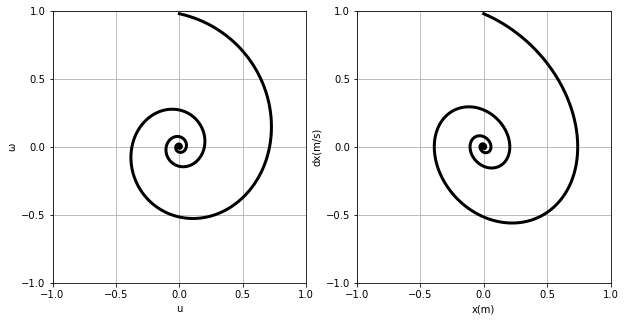

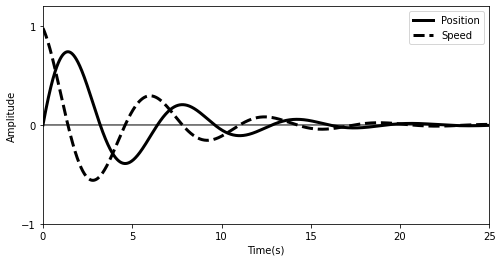

In [1]:
import numpy as np
import matplotlib.pyplot as plt
count = 0

k = 1
m = 1

beta = 0.2
omega0 = np.sqrt(k/m)
omega1 = np.sqrt(omega0**2-beta**2)
delta = np.pi/2

A = 1

start = 0
end = 25
resolution = (end-start)*100

t = np.linspace(start, end, resolution)
x = A*np.exp(-beta*t)*np.cos(omega1*t-delta)
dx = -A*np.exp(-beta*t)*(beta*np.cos(omega1*t-delta)+omega1*np.sin(omega1*t-delta))

u = omega1*x
omega = beta*x + dx
rho = np.sqrt(u**2 + omega**2)

L0 = t*0

fig, pa = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

pa[0].plot(u, omega,'-k', lw=3)

pa[0].set_xlabel('u')
pa[0].set_ylabel('ω')
pa[0].set_xticks([-1, -0.5, 0, 0.5, 1])
pa[0].set_yticks([-1, -0.5, 0, 0.5, 1])
pa[0].set_xlim([-1, 1])
pa[0].set_ylim([-1, 1])
pa[0].grid()

pa[1].plot(x, dx,'-k', lw=3)

pa[1].set_xlabel('x(m)')
pa[1].set_ylabel('dx(m/s)')
pa[1].set_xticks([-1, -0.5, 0, 0.5, 1])
pa[1].set_yticks([-1, -0.5, 0, 0.5, 1])
pa[1].set_xlim([-1, 1])
pa[1].set_ylim([-1, 1])
pa[1].grid()

fig, pb = plt.subplots(figsize=(8,4))

pb.plot(t, L0,'-k', lw=1)
pb.plot(t, x, '-k', lw=3, label='Position')
pb.plot(t, dx,'--k', lw=3, label='Speed')

pb.set_xlabel('Time(s)')
pb.set_ylabel('Amplitude')
pb.set_yticks([-1, 0, 1])
pb.set_xlim([0, 25])
pb.set_ylim([-1, 1.2])
pb.legend()

### Critically Damped Motion

### Overdamped Motion

If the damping parameter $\beta$ is even larger than $\omega_0$, then overdamping results. Because $\beta^2 > \omega_0^2$, the exponents in the brackets of Equation 3.37 become real quantities:

$$
    x(t) = e^{-\beta t} [A_1 e^{\omega_2 t} + A_2 e^{\omega_2 t}]
$$

where

$$
    \omega_2 = \sqrt{\beta^2 - \omega_0^2}
$$

Note that $\omega_0^2$ does not represent an angular frequency, because the motion is not periodic. The displacement asymptotically approaches the equilibrium position (Figure 3-6).

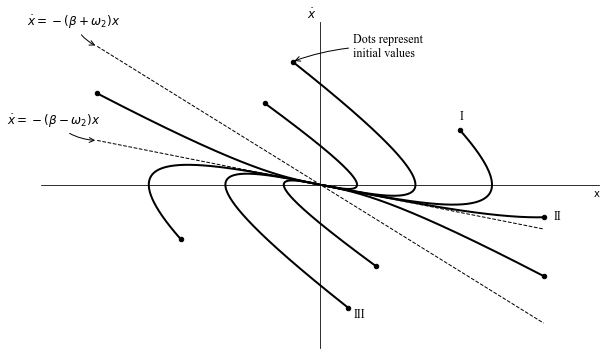

In [110]:
import numpy as np
import matplotlib.pyplot as plt

beta = 0.35
omega0 = 0.3
omega2 = np.sqrt(beta**2-omega0**2)

A11 = 0.6
A21 = -0.35

A12 = 0.2
A22 = 0.2

A122 = 0.45
A222 = -0.05

A13 = -0.45
A23 = 0.5

A132 = -0.2
A232 = 0.3

start = 0
end = 25
resolution = (end-start)*100

t = np.linspace(start, end, resolution)

x1 = np.exp(-beta*t)*(A11*np.exp(omega2*t)+A21*np.exp(-omega2*t))
dx1 = -(np.exp(-beta*t))*(beta*(A11*np.exp(omega2*t)+A21*np.exp(-omega2*t))-omega2*(A11*np.exp(omega2*t)-A21*np.exp(-omega2*t)))

x2 = np.exp(-beta*t)*(A12*np.exp(omega2*t)+A22*np.exp(-omega2*t))
dx2 = -(np.exp(-beta*t))*(beta*(A12*np.exp(omega2*t)+A22*np.exp(-omega2*t))-omega2*(A12*np.exp(omega2*t)-A22*np.exp(-omega2*t)))

x22 = np.exp(-beta*t)*(A122*np.exp(omega2*t)+A222*np.exp(-omega2*t))
dx22 = -(np.exp(-beta*t))*(beta*(A122*np.exp(omega2*t)+A222*np.exp(-omega2*t))-omega2*(A122*np.exp(omega2*t)-A222*np.exp(-omega2*t)))

x3 = np.exp(-beta*t)*(A13*np.exp(omega2*t)+A23*np.exp(-omega2*t))
dx3 = -(np.exp(-beta*t))*(beta*(A13*np.exp(omega2*t)+A23*np.exp(-omega2*t))-omega2*(A13*np.exp(omega2*t)-A23*np.exp(-omega2*t)))

x32 = np.exp(-beta*t)*(A132*np.exp(omega2*t)+A232*np.exp(-omega2*t))
dx32 = -(np.exp(-beta*t))*(beta*(A132*np.exp(omega2*t)+A232*np.exp(-omega2*t))-omega2*(A132*np.exp(omega2*t)-A232*np.exp(-omega2*t)))

xL = np.linspace(-0.4, 0.4, 100)
dxLa = -(beta + omega2)*xL
dxLb = -(beta - omega2)*xL

fig, pa = plt.subplots(figsize=(10,6))

pa.plot(x1, dx1,'-k', lw=2, label='Case I')
pa.plot(-x1, -dx1,'-k', lw=2)

pa.plot(x2, dx2,'-k', lw=2)
pa.plot(-x2, -dx2,'-k', lw=2)

pa.plot(x22, dx22,'-k', lw=2, label='Case II')

pa.plot(x3, dx3,'-k', lw=2, label='Case III')
pa.plot(-x3, -dx3,'-k', lw=2)

pa.plot(x32, dx32,'-k', lw=2)
pa.plot(-x32, -dx32,'-k', lw=2)

pa.plot(xL, dxLa,'--k', lw=1)
pa.plot(xL, dxLb,'--k', lw=1)

pa.scatter( x1[0],  dx1[0], 20, color ='black')
pa.scatter(-x1[0], -dx1[0], 20, color ='black')
pa.scatter( x2[0],  dx2[0], 20, color ='black')
pa.scatter(-x2[0], -dx2[0], 20, color ='black')
pa.scatter(x22[0], dx22[0], 20, color ='black')
pa.scatter( x3[0],  dx3[0], 20, color ='black')
pa.scatter(-x3[0], -dx3[0], 20, color ='black')
pa.scatter( x32[0],  dx32[0], 20, color ='black')
pa.scatter(-x32[0], -dx32[0], 20, color ='black')


pa.annotate('I', xy=(x1[0], dx1[0]+0), xycoords='data', xytext=(0, +10), textcoords='offset points', fontsize=12, fontname='Times New Roman')
pa.annotate('II', xy=(x22[0], dx22[0]+0), xycoords='data', xytext=(+10, -3), textcoords='offset points', fontsize=12, fontname='Times New Roman')
pa.annotate('III', xy=(x3[0], dx3[0]+0), xycoords='data', xytext=(+5, -10), textcoords='offset points', fontsize=12, fontname='Times New Roman')


pa.annotate('Dots represent' "\n" 'initial values',
             xy=(-x3[0], -dx3[0]+0), xycoords='data',
             xytext=(+60, +5), textcoords='offset points', fontsize=12, fontname='Times New Roman',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.1")) 

xLpa = -0.4
pa.annotate(r'$\dot{x} = -(\beta + \omega_2)x$',
             xy=(xLpa, -(beta + omega2)*xLpa), xycoords='data',
             xytext=(-70, +20), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

xLpb = -0.4
pa.annotate(r'$\dot{x} = -(\beta - \omega_2)x$',
             xy=(xLpb, -(beta - omega2)*xLpb), xycoords='data',
             xytext=(-90, +15), textcoords='offset points', fontsize=12, 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

pa.set_xlim([-0.5, 0.5])
pa.set_ylim([-0.25, 0.25])
pa.set_xlabel('x', loc='right')
pa.set_ylabel(r'$\dot{x}$', loc='top',rotation=0, fontsize=12)

pa.set_xticks([])
pa.set_yticks([])

pa.spines['right'].set_visible(False)
pa.spines['top'].set_visible(False)
pa.xaxis.set_ticks_position('bottom')
pa.spines['bottom'].set_position(('data',0))
pa.yaxis.set_ticks_position('left')
pa.spines['left'].set_position(('data',0))


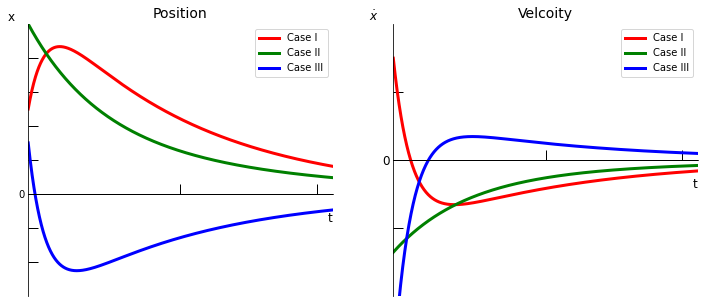

In [2]:
import numpy as np
import matplotlib.pyplot as plt


beta = 0.5
omega0 = 0.3
omega2 = np.sqrt(beta**2-omega0**2)

beta2 = 0.15
omega02 = 0.13
omega22 = np.sqrt(beta2**2-omega02**2)


A11 = 0.6
A21 = -0.35

A12 = 0.2
A22 = 0.3

A13 = -0.35
A23 = 0.5

start = 0
end = 25
resolution = (end-start)*100

t = np.linspace(start, end, resolution)

x1 = np.exp(-beta*t)*(A11*np.exp(omega2*t)+A21*np.exp(-omega2*t))
dx1 = -(np.exp(-beta*t))*(beta*(A11*np.exp(omega2*t)+A21*np.exp(-omega2*t))-omega2*(A11*np.exp(omega2*t)-A21*np.exp(-omega2*t)))

x22 = np.exp(-beta2*t)*(A12*np.exp(omega22*t)+A22*np.exp(-omega22*t))
dx22 = -(np.exp(-beta2*t))*(beta2*(A12*np.exp(omega22*t)+A22*np.exp(-omega22*t))-omega22*(A12*np.exp(omega22*t)-A22*np.exp(-omega22*t)))

x3 = np.exp(-beta*t)*(A13*np.exp(omega2*t)+A23*np.exp(-omega2*t))
dx3 = -(np.exp(-beta*t))*(beta*(A13*np.exp(omega2*t)+A23*np.exp(-omega2*t))-omega2*(A13*np.exp(omega2*t)-A23*np.exp(-omega2*t)))

tL = np.linspace(-30, 30, resolution)
L0 = tL*0

xL = np.linspace(-1, 1, 100)
dxLa = -(beta + omega2)*xL
dxLb = -(beta - omega2)*xL

fig, pb = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

pb[0].plot(t, x1,'-r', lw=3, label='Case I')
pb[0].plot(t, x22,'-g', lw=3, label='Case II')
pb[0].plot(t, x3,'-b', lw=3, label='Case III')

pb[0].plot(tL, L0,'-k', lw=1)
pb[0].set_xlim([0, 20])
pb[0].set_ylim([-0.3, 0.5])
pb[0].set_xlabel('t', loc='right', fontsize=12)
pb[0].set_ylabel('x', loc='top',rotation=0, fontsize=12)
pb[0].set_xticks([10, 19])
pb[0].set_xticklabels([' ', ' '])
pb[0].set_yticks([-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4])
pb[0].set_yticklabels([' ', ' ', '0', ' ', ' ', ' ', ' '])
pb[0].tick_params(direction='in', length=10, width=1, colors='k')
pb[0].spines['right'].set_visible(False)
pb[0].spines['top'].set_visible(False)
pb[0].xaxis.set_ticks_position('bottom')
pb[0].spines['bottom'].set_position(('data',0))
pb[0].set_title('Position', fontsize=14)

pb[1].plot(tL, L0,'-k', lw=1)
pb[1].set_xlim([1, 20])
pb[1].set_ylim([-0.1, 0.1])
pb[1].set_xlabel('t', loc='right', fontsize=12)
pb[1].set_ylabel(r'$\dot{x}$', loc='top' ,rotation=0, fontsize=12)
pb[1].set_xticks([10.5, 19])
pb[1].set_xticklabels([' ', ' '])
pb[1].set_yticks([-0.05, 0, 0.05])
pb[1].set_yticklabels([' ', '0',' '], fontsize=12)
pb[1].tick_params(direction='in', length=10, width=1, colors='k')
pb[1].spines['right'].set_visible(False)
pb[1].spines['top'].set_visible(False)
pb[1].xaxis.set_ticks_position('bottom')
pb[1].spines['bottom'].set_position(('data',0))
pb[1].set_title('Velcoity', fontsize=14)

pb[1].plot(t, dx1,'-r', lw=3, label='Case I')
pb[1].plot(t, dx22,'-g', lw=3, label='Case II')
pb[1].plot(t, dx3,'-b', lw=3, label='Case III')

pb[0].legend()
pb[1].legend()